In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [22]:
#load dataset

df = pd.read_csv('/Users/daniyalrosli/fyp/heart_disease_data.csv')

In [23]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')



In [24]:
#info about the dataset

print(df.info())
print(df.describe())
print(df.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

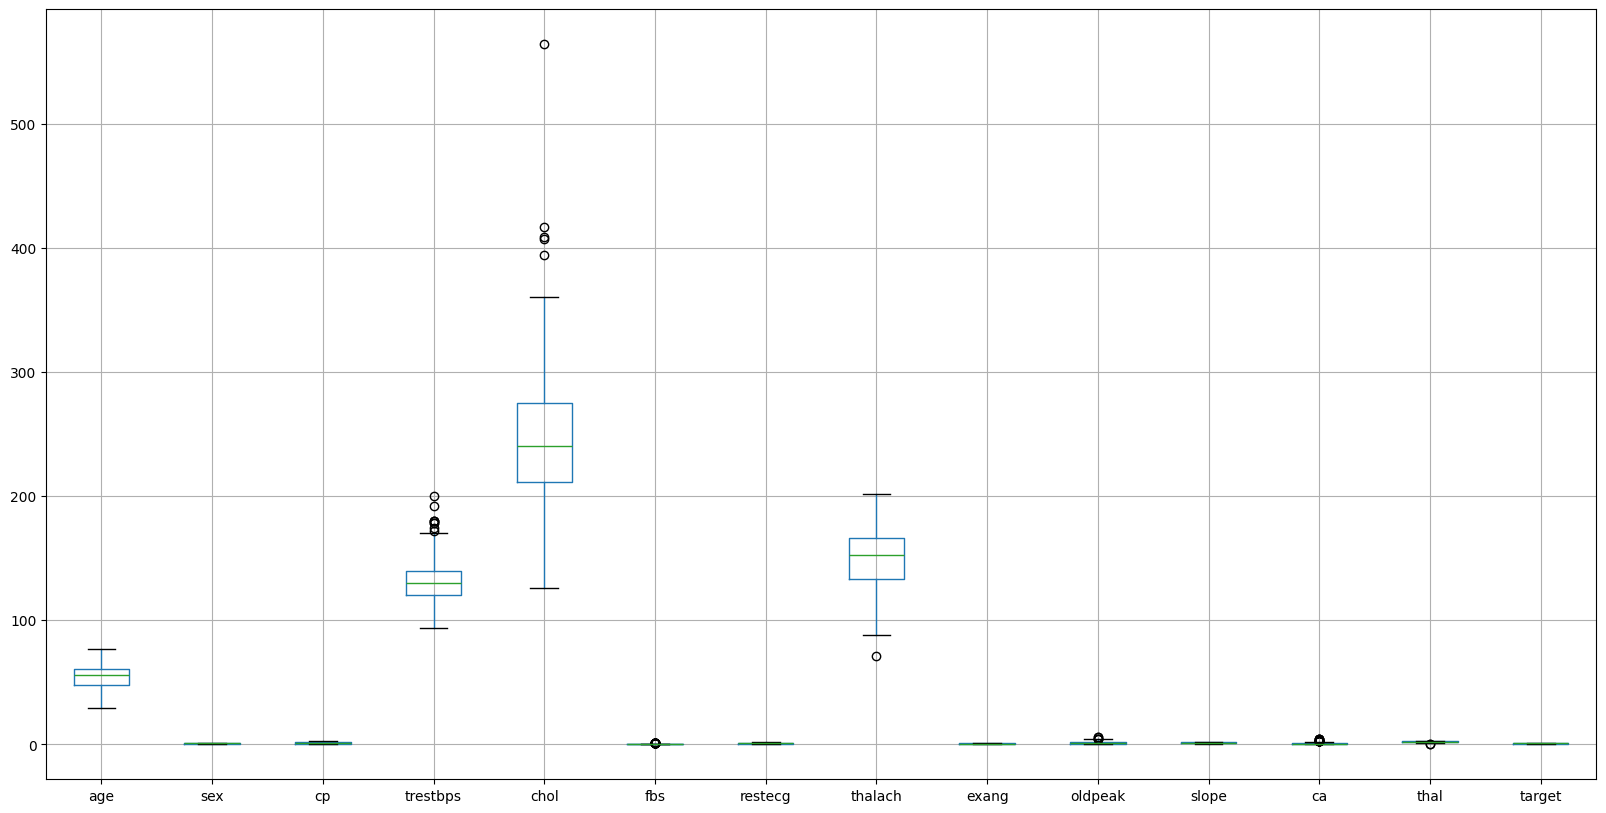

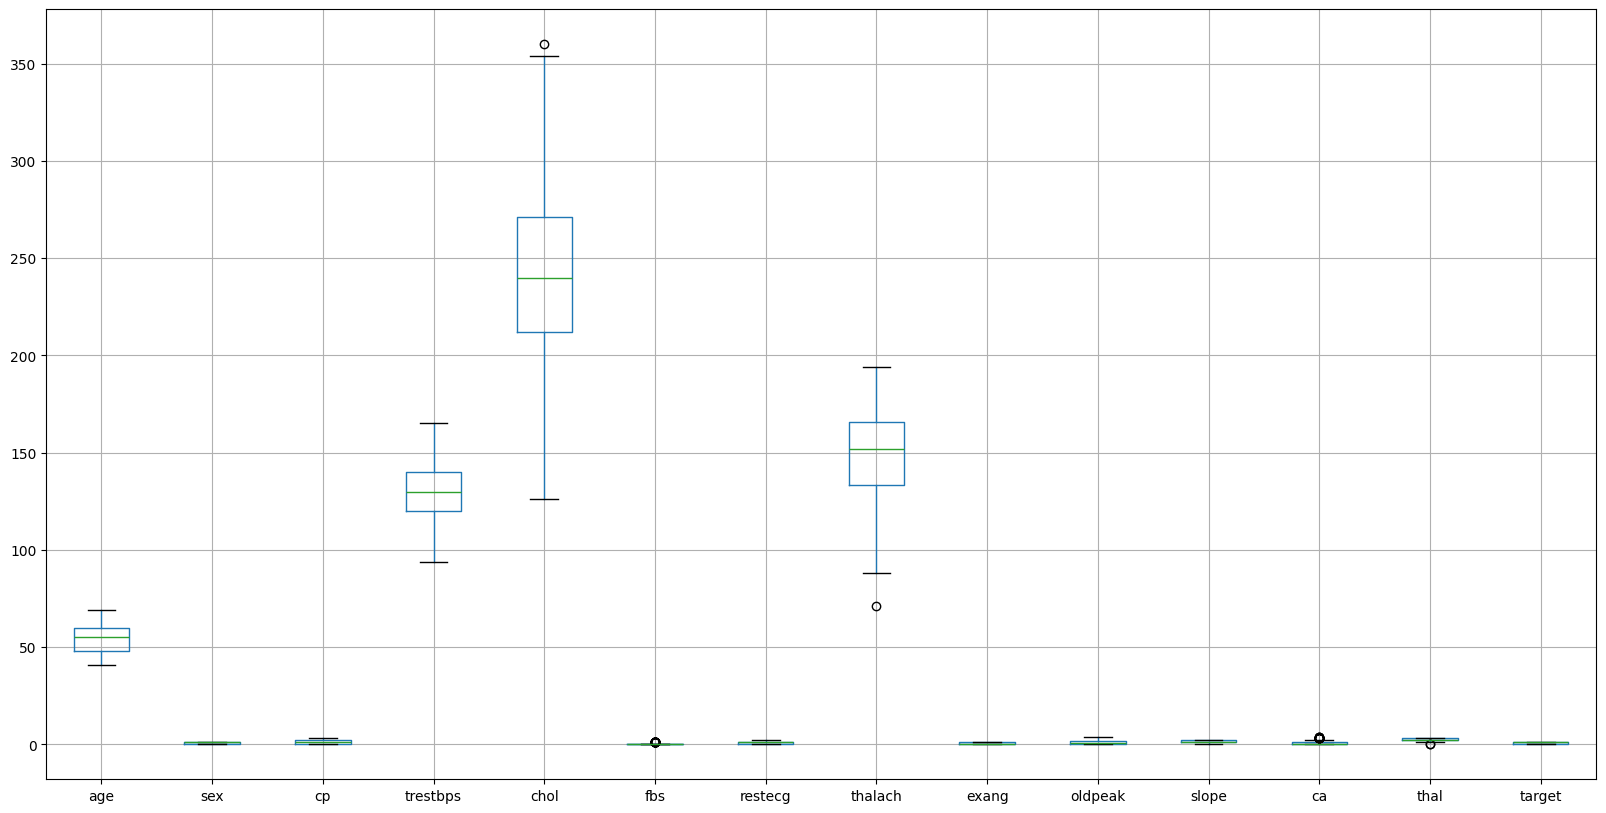

In [25]:
#data preprocessing

#check for missing values
#data cleaning

df.isnull().sum()

#check for duplicates
df.duplicated().sum()

#drop duplicates

df.drop_duplicates(inplace=True)

#remove outliers
#boxplot
df.boxplot(figsize=(20,10))
plt.show()

#remove outliers
df = df[df['chol']<370]
df = df[df['trestbps']<170]
df = df[df['thalach']<200]
df = df[df['oldpeak']<4]
df = df[df['age']<70]
df = df[df['age']>40]

#boxplot
df.boxplot(figsize=(20,10))
plt.show()






In [28]:
#feature engineering

from sklearn.preprocessing import StandardScaler

# Ensure that categorical variables are properly encoded
categorical_features = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)

# Define numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize and scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [30]:
from sklearn.preprocessing import StandardScaler

#data cleaning 

# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Encode categorical variables
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal']
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])



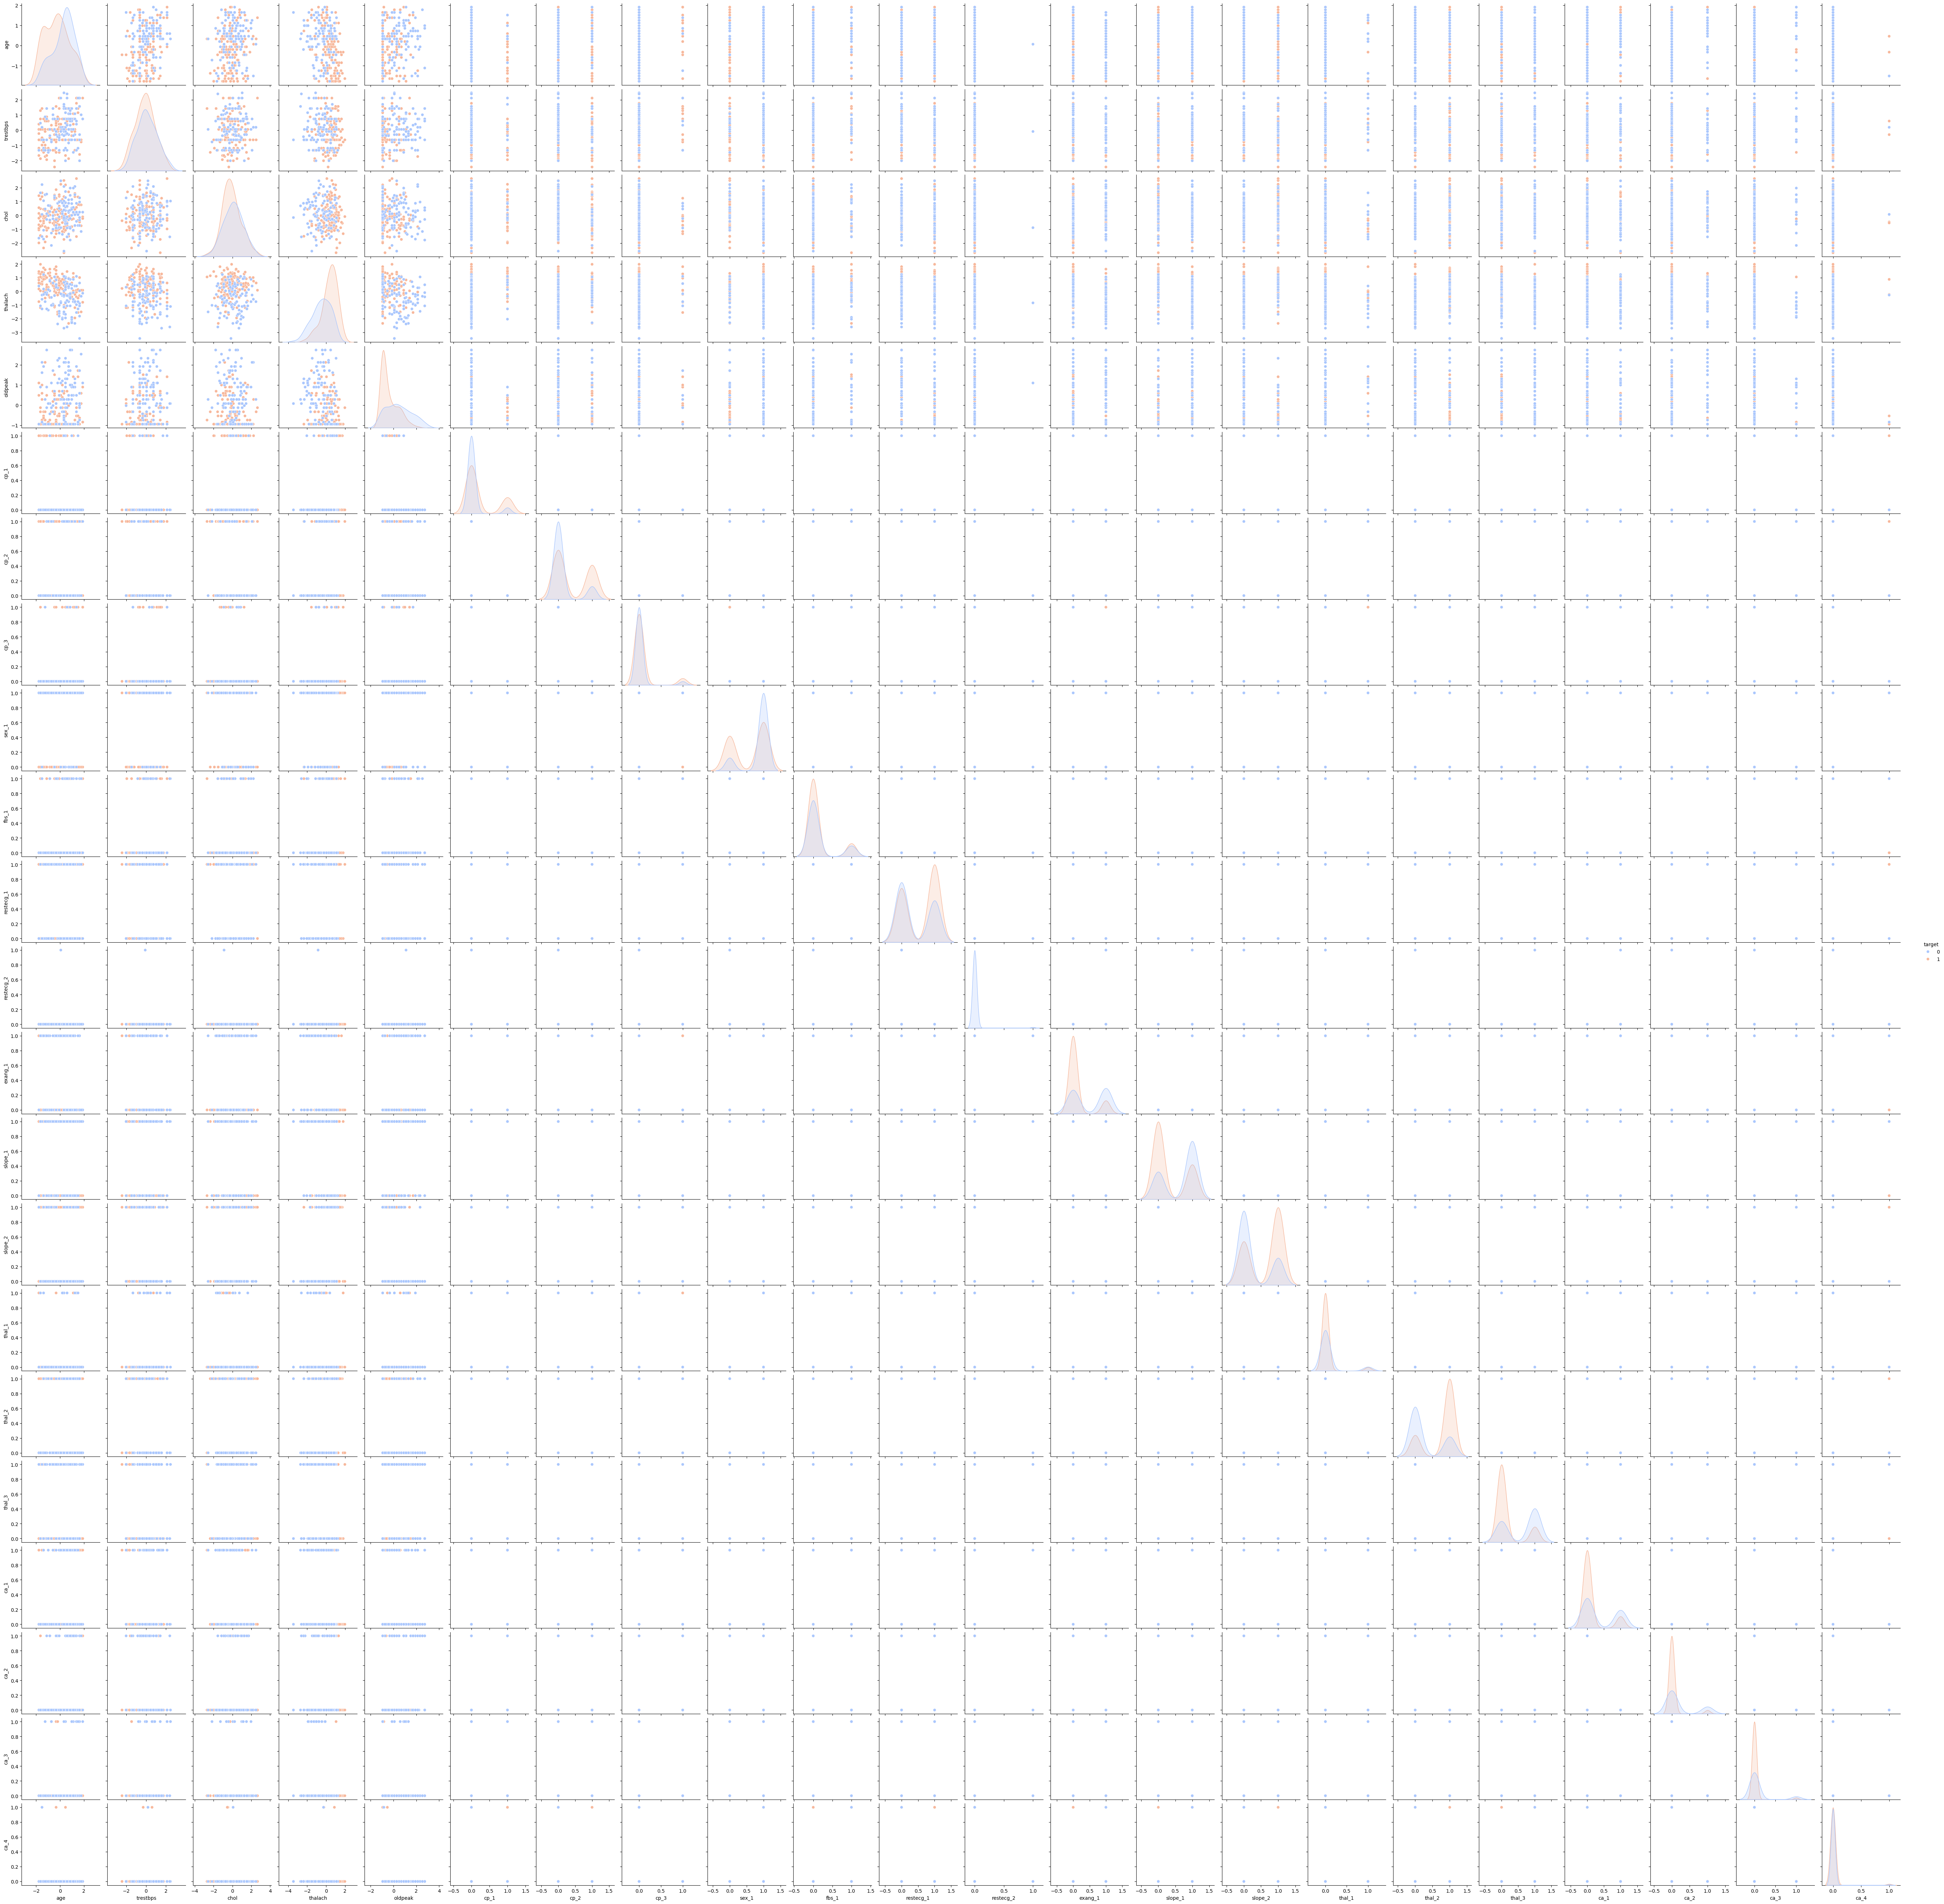

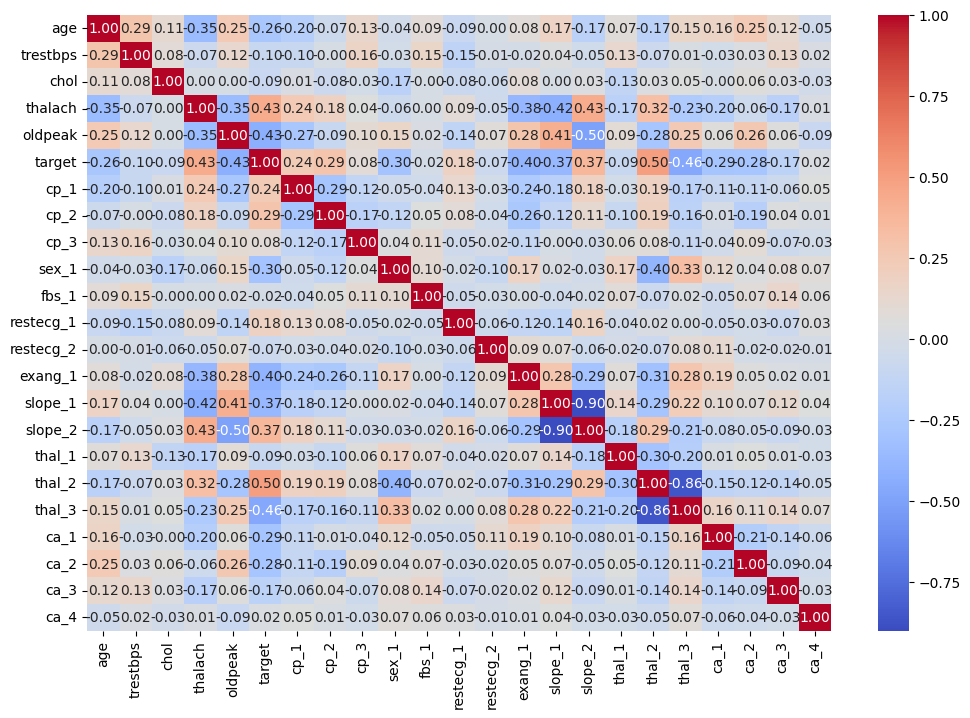

In [31]:
import seaborn as sns

#exploratory data analysis

# Pairplot to visualize relationships between features
sns.pairplot(df, diag_kind='kde', hue='target', palette='coolwarm')
plt.show()

# Heatmap to visualize correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

                age      trestbps          chol         fbs       thalach  \
count  2.510000e+02  2.510000e+02  2.510000e+02  251.000000  2.510000e+02   
mean  -2.830848e-17 -1.132339e-16  1.344653e-16    0.151394 -5.661695e-17   
std    1.001998e+00  1.001998e+00  1.001998e+00    0.359149  1.001998e+00   
min   -1.768251e+00 -2.014463e+00 -2.196238e+00    0.000000 -2.439336e+00   
25%   -8.507032e-01 -6.354087e-01 -7.396633e-01    0.000000 -7.068436e-01   
50%    6.684470e-02  5.411825e-02 -9.229672e-02    0.000000  1.265098e-01   
75%    7.222360e-01  7.436452e-01  6.244306e-01    0.000000  7.346325e-01   
max    1.901940e+00  2.467462e+00  2.682131e+00    1.000000  1.924787e+00   

            exang       oldpeak          ca      target  
count  251.000000  2.510000e+02  251.000000  251.000000  
mean     0.310757 -1.981593e-16    0.709163    0.553785  
std      0.463728  1.001998e+00    0.971121    0.498092  
min      0.000000 -9.492930e-01    0.000000    0.000000  
25%      0.00000

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#model development
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the models

# Decision Tree evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Random Forest evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Logistic Regression evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print evaluation metrics
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")
print(f"Logistic Regression - Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1 Score: {f1_lr}")

NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC for each model
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Print ROC-AUC scores
print(f"Decision Tree - ROC-AUC: {roc_auc_dt}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf}")
print(f"Logistic Regression - ROC-AUC: {roc_auc_lr}")

Decision Tree - ROC-AUC: 0.7402439024390244
Random Forest - ROC-AUC: 0.8224390243902439
Logistic Regression - ROC-AUC: 0.8102439024390243


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.813187   0.823529    0.84  0.831683  0.876585
1        Random Forest  0.835165   0.843137    0.86  0.851485  0.918537
2        Decision Tree  0.714286   0.772727    0.68  0.723404  0.718049


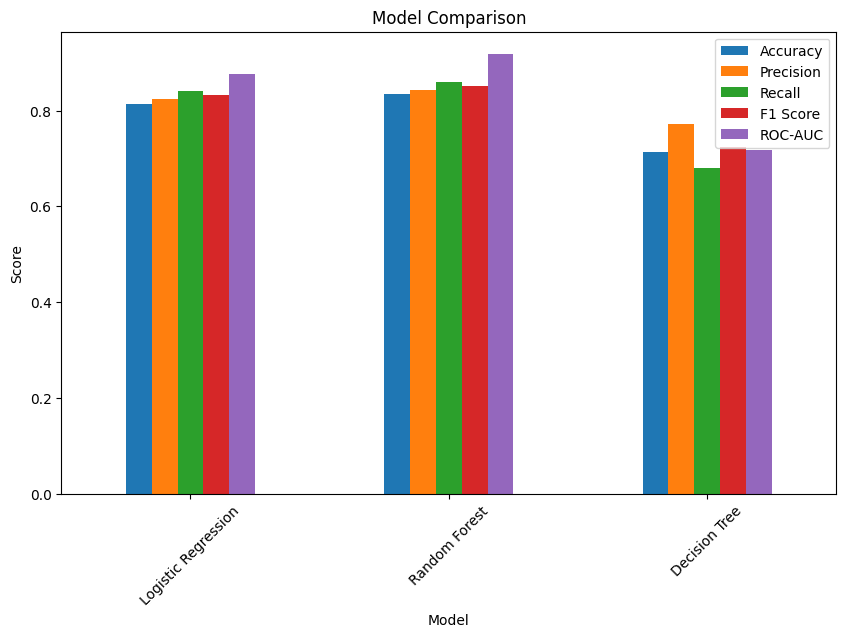

In [ ]:
# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Create a DataFrame for model comparison
performance_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'ROC-AUC': roc_auc_list
})

# Display model comparison
print(performance_df)

# Plot the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

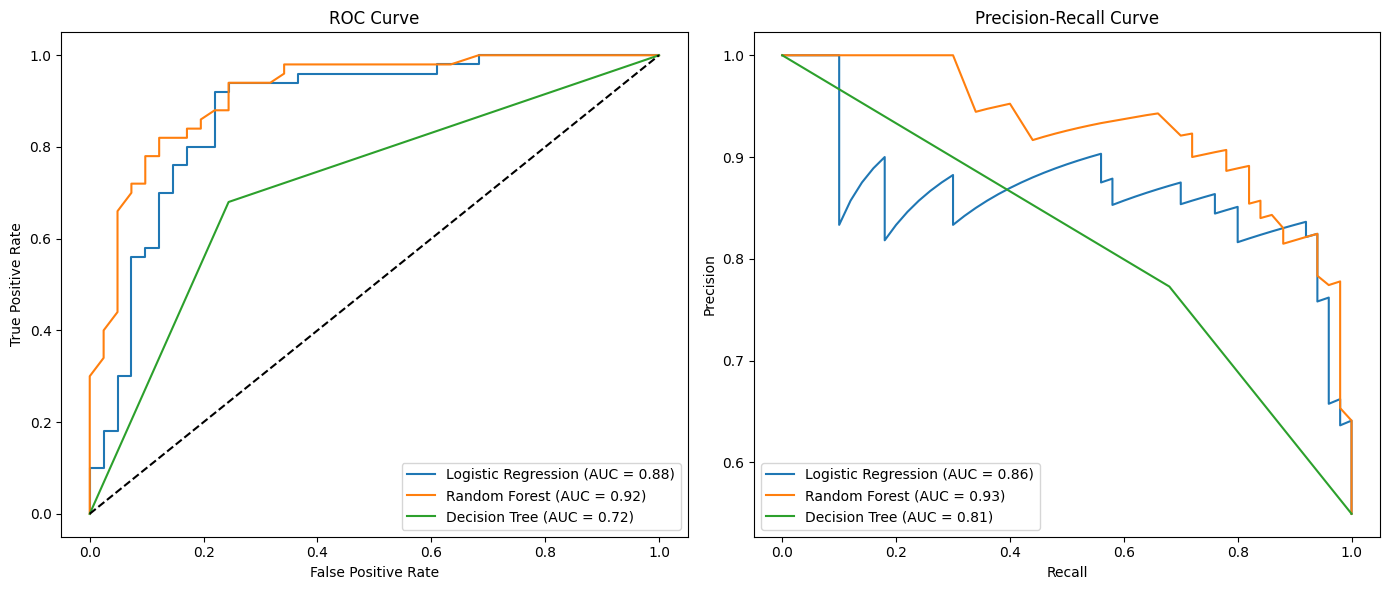

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Function to plot ROC and Precision-Recall curves
def plot_model_performance(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC curves
    plt.subplot(1, 2, 1)
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curves
    plt.subplot(1, 2, 2)
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the curves
plot_model_performance(models, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                              param_grid=param_grid_dt, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy for Decision Tree: {best_score_dt}")

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy for Random Forest: {best_score_rf}")

# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'penalty': ['l2'],                     # Regularization term
    'max_iter': [100, 200, 300]            # Maximum iterations
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                              param_grid=param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation accuracy for Logistic Regression: {best_score_lr}")

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.8395348837209301
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8346622369878183


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8300110741971206


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
num_features = X_train.shape[1]
print(f"The model was trained with {num_features} features.")

The model was trained with 13 features.


In [ ]:
print(f"X_train shape: {X_train.shape}")  # Should be (n_samples, 13)
print(f"X_test shape: {X_test.shape}")    # Should be (n_samples, 13)

X_train shape: (212, 13)
X_test shape: (91, 13)


Decision Tree Feature Importances:
     Feature  Importance
11        ca    0.269572
12      thal    0.159347
2         cp    0.090569
9    oldpeak    0.085264
0        age    0.074277
4       chol    0.060182
7    thalach    0.056710
3   trestbps    0.051969
8      exang    0.047524
10     slope    0.045912
1        sex    0.030167
5        fbs    0.028507
6    restecg    0.000000


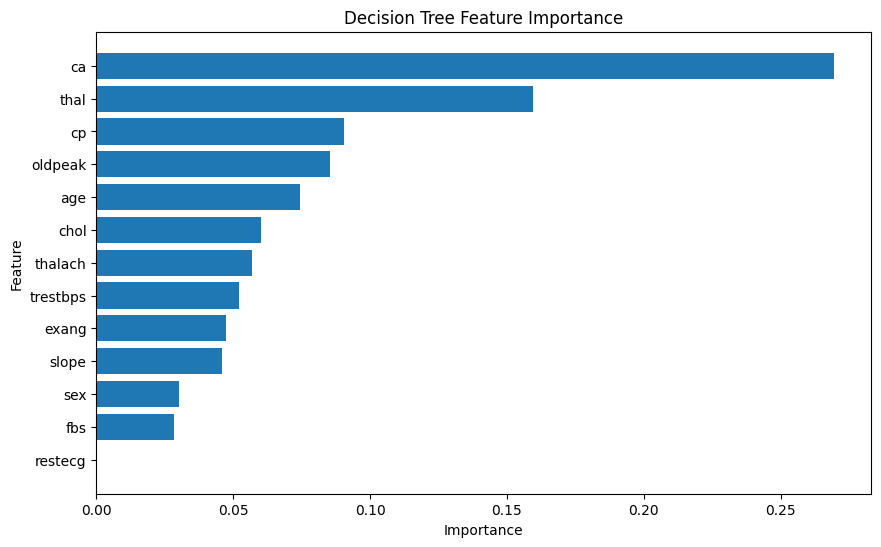

Random Forest Feature Importances:
     Feature  Importance
11        ca    0.130748
2         cp    0.127354
9    oldpeak    0.114747
7    thalach    0.112542
12      thal    0.102450
0        age    0.091211
4       chol    0.069850
3   trestbps    0.068903
8      exang    0.068661
10     slope    0.051656
1        sex    0.034049
6    restecg    0.015358
5        fbs    0.012472


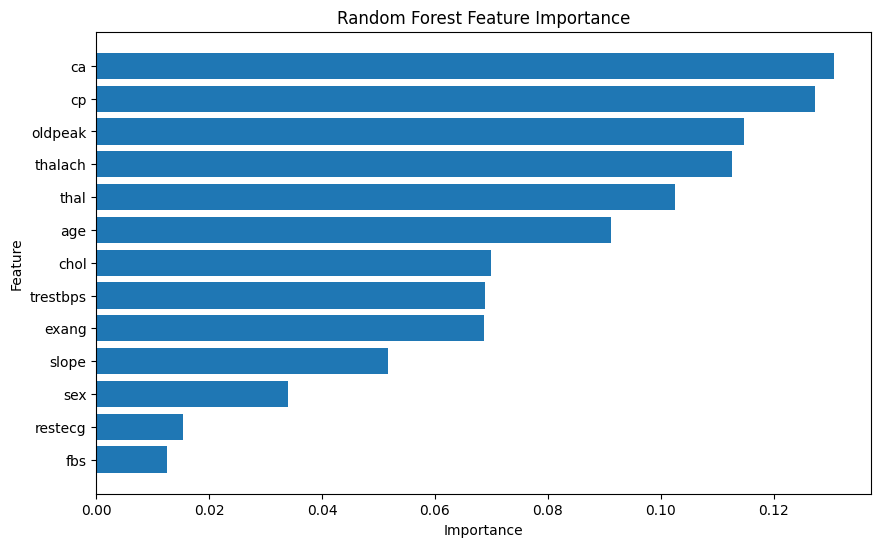

Logistic Regression Feature Importances:
     Feature  Importance
12      thal    1.160089
1        sex    1.156141
11        ca    1.050924
8      exang    1.036642
10     slope    0.810798
2         cp    0.798323
6    restecg    0.609661
9    oldpeak    0.502311
5        fbs    0.366666
7    thalach    0.017692
3   trestbps    0.006272
0        age    0.004929
4       chol    0.003370


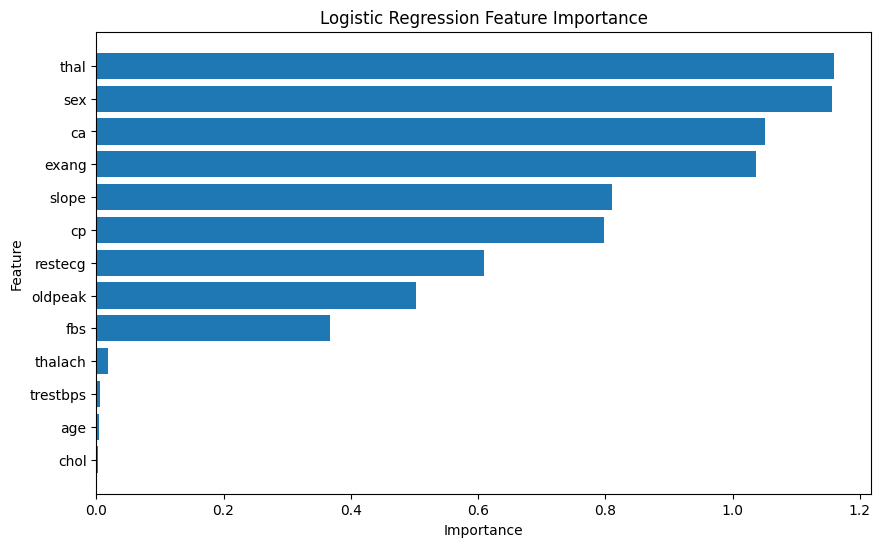

In [ ]:
# Analyze feature importance for Decision Tree
dt_feature_importances = dt_model.feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importances:")
print(dt_importance_df)

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Analyze feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importance_df)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Analyze feature importance for Logistic Regression
lr_feature_importances = np.abs(lr_model.coef_[0])
lr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importances:")
print(lr_importance_df)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(lr_importance_df['Feature'], lr_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()



                 Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.813187   0.823529    0.84  0.831683  0.876585
1        Random Forest  0.835165   0.843137    0.86  0.851485  0.918537
2        Decision Tree  0.714286   0.772727    0.68  0.723404  0.718049


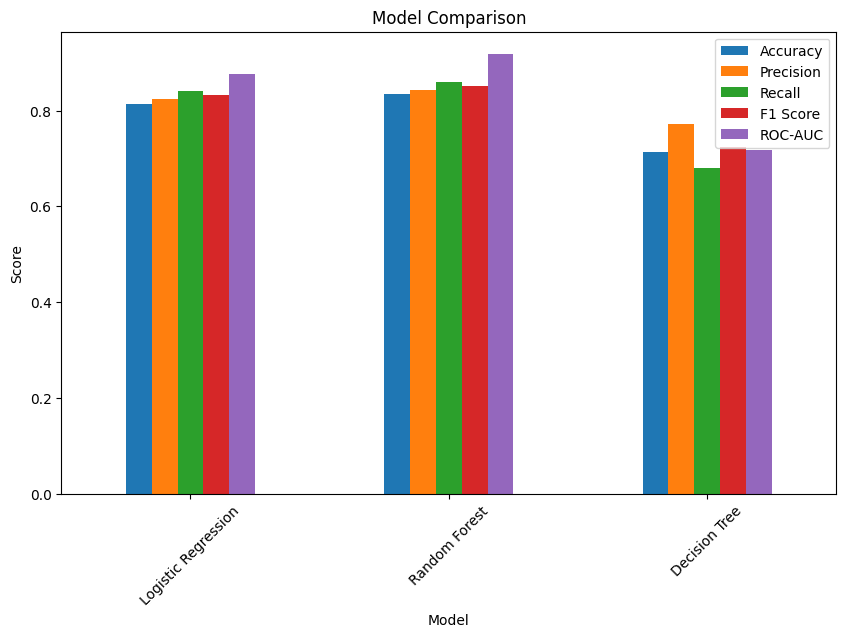

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Evaluate each model
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Create a DataFrame for model comparison
performance_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'ROC-AUC': roc_auc_list
})

# Display model comparison
print(performance_df)

# Plot the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#pick the best model

# Random Forest is the best model based on the evaluation metrics

# Save the Random Forest model

import joblib

# Save the model as a pickle file

joblib.dump(rf_model, 'heart_disease_model.pkl')

# Load the model from the pickle file

loaded_model = joblib.load('heart_disease_model.pkl')

# Make predictions using the loaded model

y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f"Accuracy of the loaded model: {accuracy_loaded}")




Accuracy of the loaded model: 0.8241758241758241


In [ ]:
#test the model locally

# Load the model from the pickle file

loaded_model = joblib.load('heart_disease_model.pkl')

# Make predictions using the loaded model
y_pred_local = loaded_model.predict(X_test)
print(y_pred_local)


[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have your dataset loaded into a pandas DataFrame
df = pd.read_csv("heart_disease_data.csv")  # Example data file

# Extract features (X) and target (y)
X = df.drop('target', axis=1)  # 13 features
y = df['target']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled data

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
features = X_train.columns.tolist()
print(f"Features: {features}")  # Debugging: Check the input features

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
# Select a sample from the dataset
sample = df.iloc[0].drop('target').values.reshape(1, -1)

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Scale the sample
sample_scaled = scaler.transform(sample)

# Load the model
loaded_model = joblib.load('heart_disease_model.pkl')

# Make a prediction
prediction = loaded_model.predict(sample_scaled)

# Print the prediction
print(f"Prediction for the sample: {prediction[0]}")

Prediction for the sample: 1.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_62029/463092436.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Predicted', y='trestbps', palette='Set2')


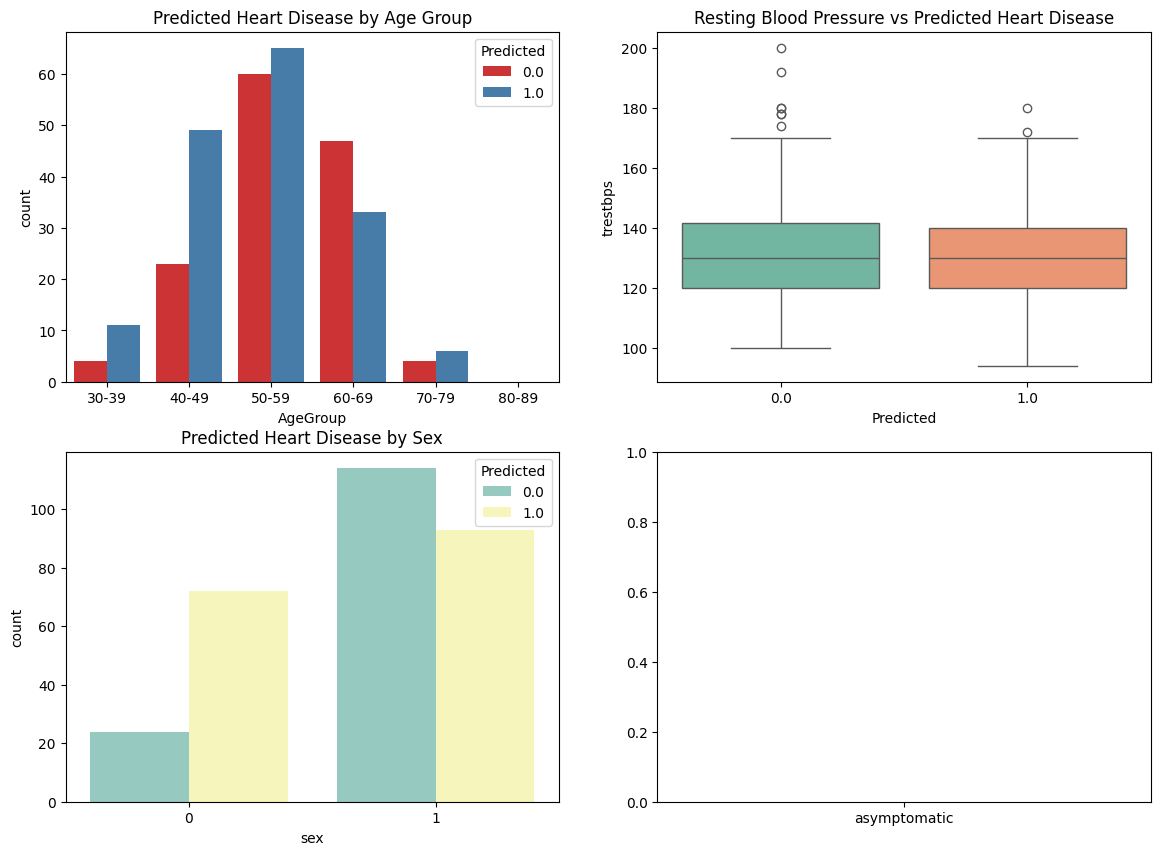

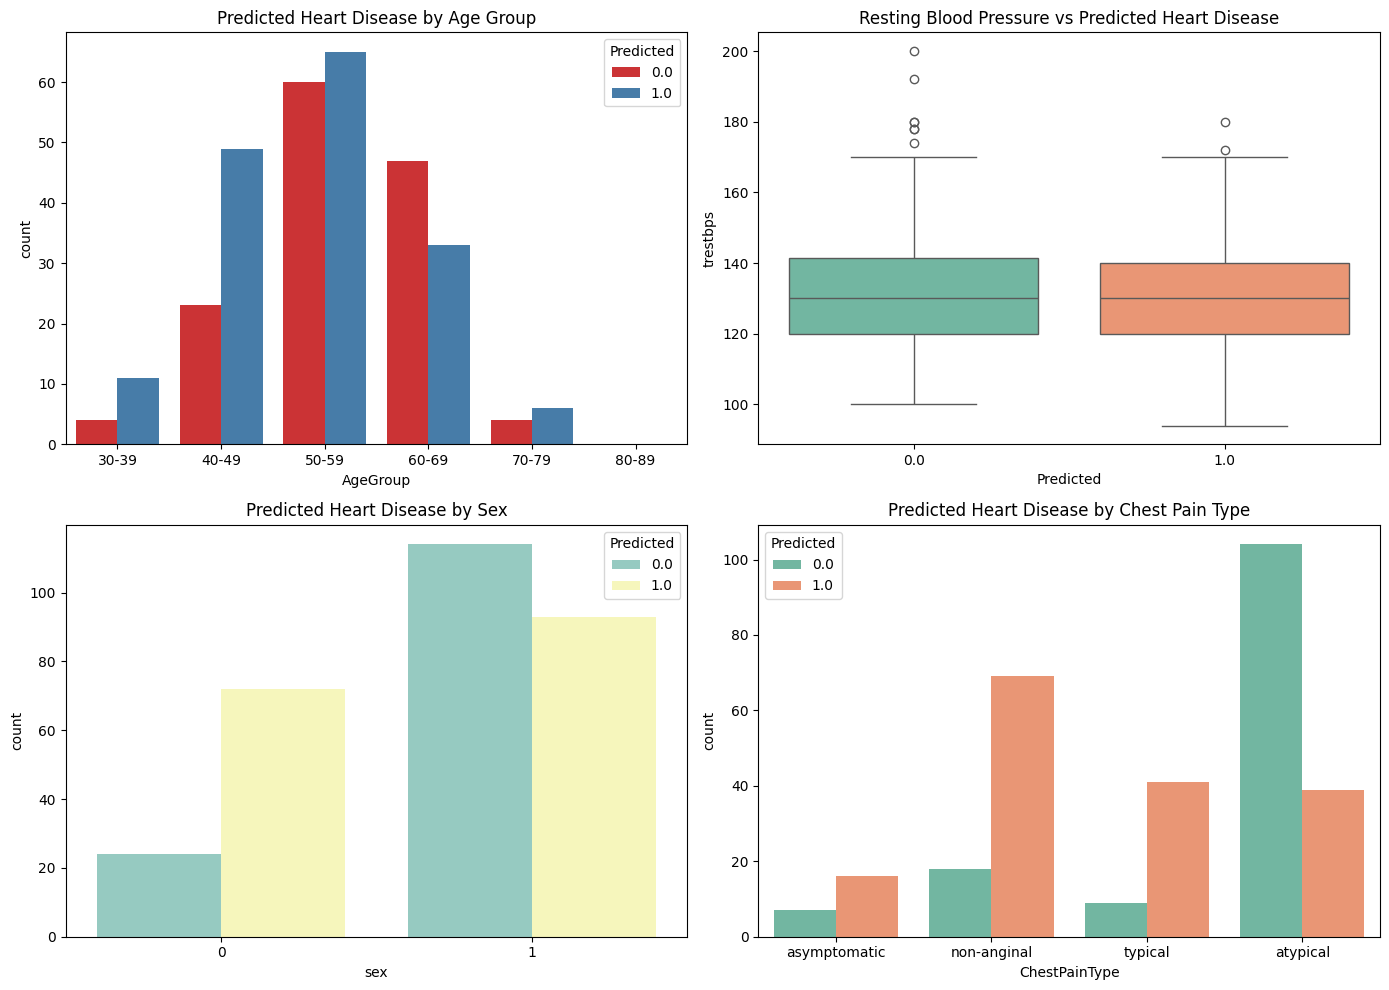

In [ ]:
# Add predictions to the original DataFrame for visualization
df['Predicted'] = rf_model.predict(X)

# Define age groups
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Create a new column for Chest Pain
df['ChestPainType'] = df['cp'].map({0: 'atypical', 1: 'typical', 2: 'non-anginal', 3: 'asymptomatic'})

# Plot number of patients predicted by classifier based on the variables
plt.figure(figsize=(14, 10))

# Age Group vs Predicted Heart Disease
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='AgeGroup', hue='Predicted', palette='Set1')
plt.title('Predicted Heart Disease by Age Group')

# Resting Blood Pressure vs Predicted Heart Disease
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Predicted', y='trestbps', palette='Set2')
plt.title('Resting Blood Pressure vs Predicted Heart Disease')

# Sex vs Predicted Heart Disease
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='sex', hue='Predicted', palette='Set3')
plt.title('Predicted Heart Disease by Sex')

# Chest Pain vs Predicted Heart Disease
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='ChestPainType', hue='Predicted', palette='Set2')
plt.title('Predicted Heart Disease by Chest Pain Type')

plt.tight_layout()
plt.show()